<a href="https://colab.research.google.com/github/DiploDatos/AnalisisyVisualizacion/blob/master/Entregable_Parte_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2021**

---
## Trabajo práctico entregable - Parte 1

In [1]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn
import time
from IPython.display import HTML, display
import math

seaborn.set_context('talk')

In [2]:
def genericPlot(ax , width_plus):
    x = 0
    
    for p in ax.patches:
       
        height = p.get_height()
        ax.text(x,       # set the text at 1 unit right of the bar
                 p.get_height() + width_plus , # get Y coordinate + X coordinate / 2
                '{:2.2f}'.format(height ), # set variable to display, 2 decimals
                ha = 'center',   # horizontal alignment
                va = 'center')  # vertical alignment
        x = x + 1   

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [3]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [4]:
df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN


In [5]:
df.dtypes

profile_gender                                   object
profile_age                                       int64
work_country                                     object
work_province                                    object
profile_years_experience                        float64
work_years_in_company                           float64
work_years_in_current_position                  float64
work_people_in_charge_of                          int64
profile_studies_level                            object
profile_studies_level_state                      object
profile_career                                   object
profile_university                               object
profile_specialization_courses                   object
profile_open_source_contributions                object
profile_programming_as_hobby                     object
work_role                                        object
tools_platform                                   object
tools_programming_languages                     

The correlation coefficient has values between -1 to 1
— A value closer to 0 implies weaker correlation (exact 0 implying no correlation)
— A value closer to 1 implies stronger positive correlation
— A value closer to -1 implies stronger negative correlation

---
### Vemos si existen correlaciones entre variables. De existir variables correlacionadas, podemos descartarlas
---

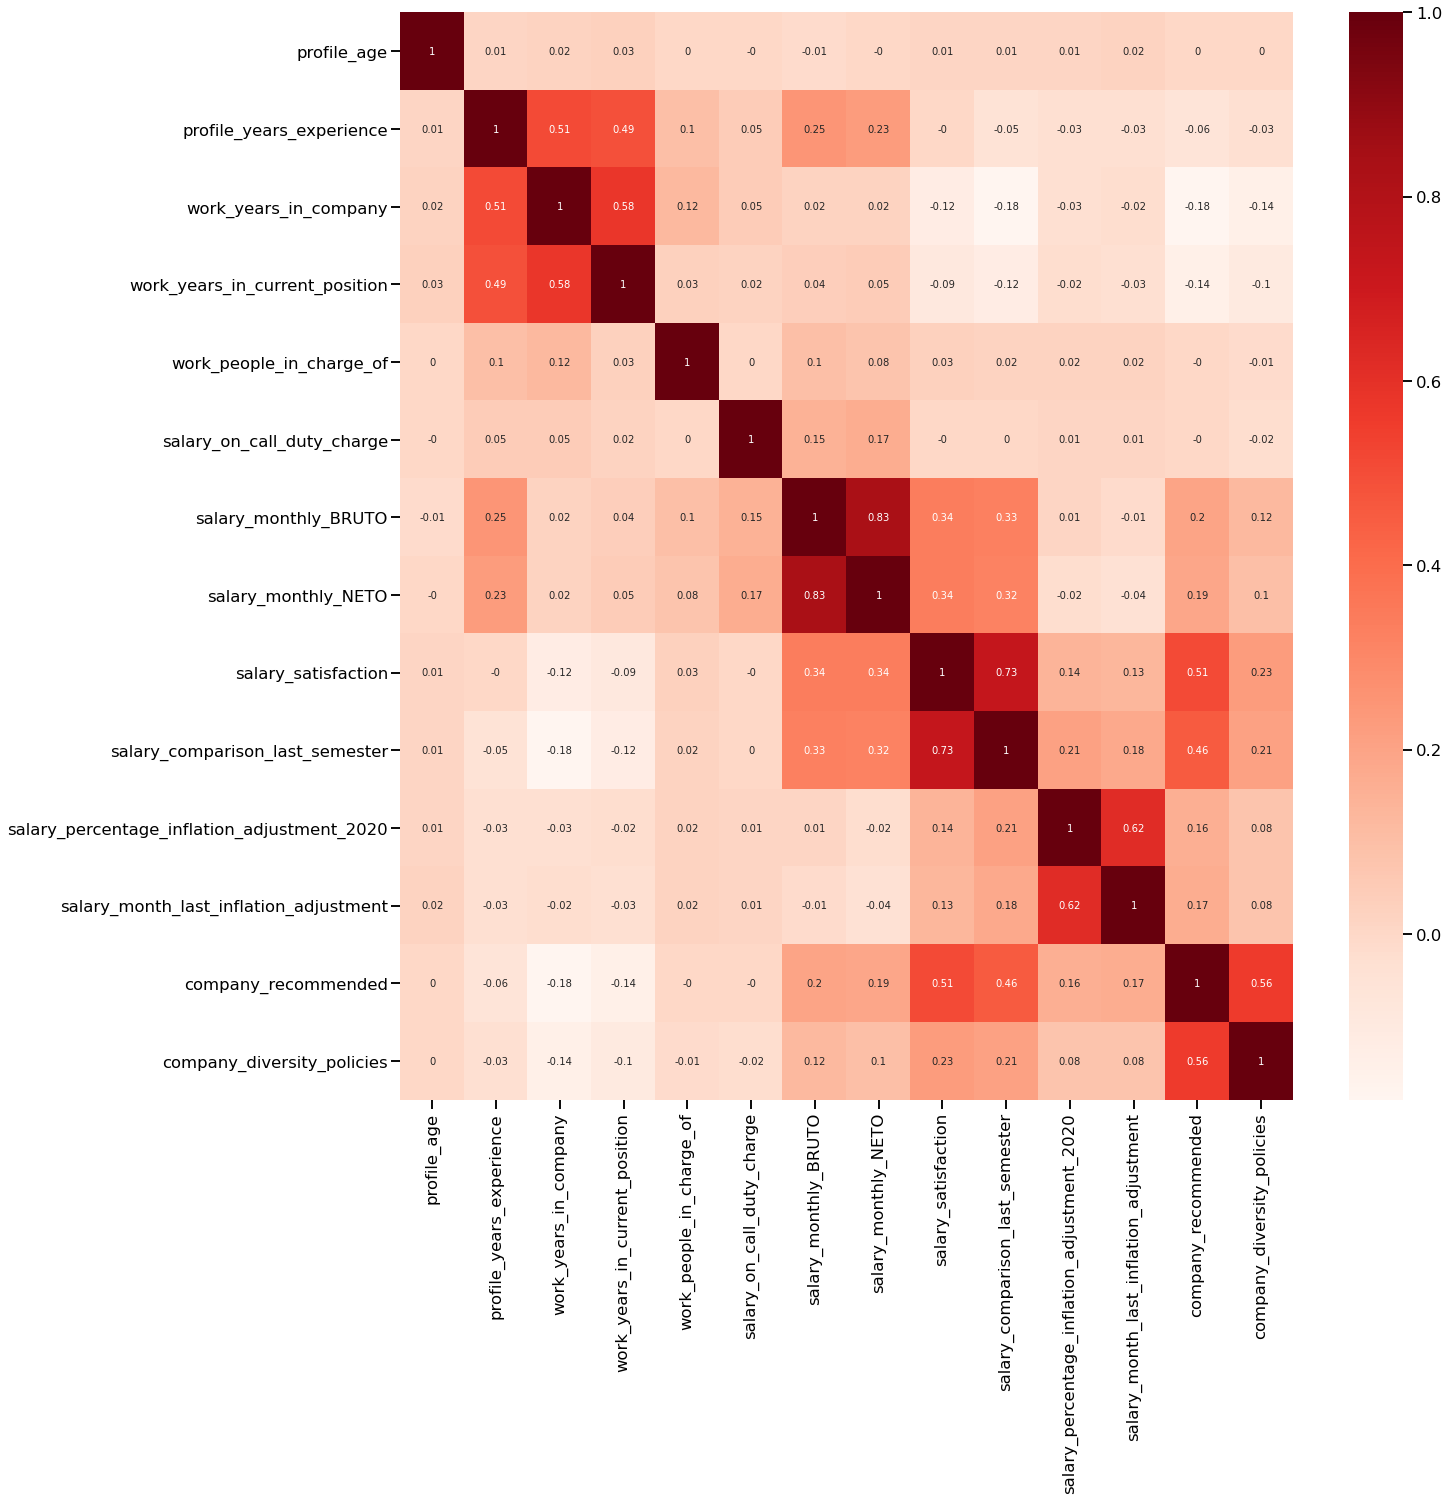

In [6]:
correlations = df.corr().round(2)

#Using Pearson Correlation
plt.figure(figsize=(20,20))

seaborn.heatmap(correlations, annot=True, cmap=plt.cm.Reds)
plt.show()

---
### De lo anterior se desprende que hay una alta correralación entre el salario bruto y el neto lo cual nos permite omitir alguna de las dos columnas. A fines prácticos se mantienen las dos variables. Pero si fuese necesario, se podría descartar alguna de las mismas.
---

# Ejercicio 1 - Análisis descriptivo

Responder a la pregunta: **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**

Para ello:
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en una sub-población. Por ejemplo, se pueden limitar a personas con un salario mayor que 10000 pesos, o a las personas que trabajan sólo en "Data Science", pero deben justificar su elección y reformular la pregunta inicial de ser necesario.
  * Obtener una lista de los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.
  * Para cada una de las otras columnas del punto anterior, elegir los rangos o valores seleccionan para incluir en el análisis.
3. Seleccionar métricas que ayuden a responder la pregunta, y los métodos para analizarlas. Elegir UNA de las siguientes opciones:
  * Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante.
  * Comparar medidas de estadística descriptiva sobre la distribución de salario para cada lenguaje. Sean creativos, la estadística descriptiva nos permite decir cosas como: "el 10% de los mejores sueldos los ganan, en su mayoría, programadores que saben kotlin!" (donde *mayoría* es un término medio engañoso que sólo significa más del 50%). Para comparar múltiples lenguajes, les recomendamos usar también visualizaciones.
  * Comparar probabilidades. Por ejemplo: "Si sabés Python o Java, tenés un 30% más de chances de ganar arriba de 100K".

Si lo consideran necesario, realicen varias iteraciones. Es decir, si encuentran que las distribuciones de los lenguajes de programación que seleccionaron inicialmente no son muy diferentes, pueden re-hacer el análisis usando sólo los lenguajes de programación que son diferentes.

---
# Limpieza de datos
---


### Identificamos las columnas que tienen faltantes de datos y las mangintudes de los faltantes

In [7]:
df_isna = df.isna().sum()
df_isna.sort_values(ascending=False)

profile_has_disabilities                        5495
salary_in_usd                                   5419
company_best_companies_city                     4403
profile_has_disabilities_hiring_difficulties    3888
profile_university                               534
profile_career                                   299
salary_monthly_NETO                              212
profile_sexual_orientation                       183
work_has_violence_situations                     141
tools_qa_testing                                   6
tools_platform                                     2
tools_data_bases                                   2
tools_frameworks                                   1
tools_IDEs                                         1
tools_programming_languages                        1
company_extra_benefits                             1
work_people_in_charge_of                           0
profile_programming_as_hobby                       0
profile_age                                   

---
### Se detecta 212 filas las cuales tienen el campo salary_monthly_NETO sin información
---

In [8]:
cantidad_salary_monthly_NETO_nulos = df.salary_monthly_NETO.isna().sum()
cantidad_filas_df = df.shape[0]

print (" Total de filas df: {0}, total de filas donde salary_monthly_NETO no tiene valores: {1} , % {2} ".format(cantidad_filas_df, cantidad_salary_monthly_NETO_nulos ,   (cantidad_salary_monthly_NETO_nulos / cantidad_filas_df * 100).round(2) ))

 Total de filas df: 6095, total de filas donde salary_monthly_NETO no tiene valores: 212 , % 3.48 


### Corregimos las filas que no tiene salario NETO. Para ello tomamos el bruto y lo multiplicamos x 0,83

In [9]:
#Para las filas que no tienen neto, calculamos el neto haciendo BRUTO * 0.83
df['salary_monthly_NETO'] = df.apply(lambda x: x['salary_monthly_BRUTO'] * 0.83 if math.isnan(x.salary_monthly_NETO)   else x['salary_monthly_NETO'], axis=1)    

### Controlamos que no existan más filas con NETO sin valores (debe ser 0 la cantidad de filas que no tienen salario neto)

In [10]:
df['salary_monthly_NETO'].isna().sum()

0

### Vemos cuantos casos tenemos de salarios Netos mayores a salarios Brutos

In [11]:
df[df.salary_monthly_BRUTO < df.salary_monthly_NETO ].shape[0]

156

### Corregimos las filas que no tiene salario NETO. Para ello tomamos el bruto y lo multiplicamos x 0,83. Vamos a poner como bruto al neto, y luego recalculamos en neto (no se contempla descuento de ganancias, descontamos un 17% entre jub, obra soc y otros).

In [12]:
df['recalculate_salary'] = df.apply(lambda x:  x['salary_monthly_NETO'] >  x['salary_monthly_BRUTO'], axis=1)    
df['salary_monthly_BRUTO'] = df.apply(lambda x: x['salary_monthly_NETO'] if x['recalculate_salary']   else x['salary_monthly_BRUTO'], axis=1)    
df['salary_monthly_NETO'] = df.apply(lambda x: x['salary_monthly_BRUTO'] * 0.83 if x['recalculate_salary']   else x['salary_monthly_NETO'], axis=1)    

### Verificamos que no existan mas salarios netos mayores a salarios brutos

In [13]:
df[df.salary_monthly_BRUTO < df.salary_monthly_NETO ].shape[0]

0

### Verificamos los roles puesto que hemos visto que en el set de datos existen roles que no desarrollan / programan. Las filas que tengan estos roles serán eliminadas. 

In [14]:
df['work_role'].unique()

array(['Consultant', 'Developer', 'Infosec', 'SysAdmin / DevOps / SRE',
       'Manager / Director', 'Technical Leader',
       'Data Scientist / Data Engineer', 'DBA', 'Project Manager',
       'Business Analyst', 'QA / Tester', 'Architect', 'Product Manager',
       'Designer', 'BI Analyst / Data Analyst', 'Middleware',
       'VP / C-Level', 'Storage / Backup', 'Networking', 'HelpDesk', 'UX',
       'Ux User Research Analyst', 'Jefe de infraestructura ',
       'Scrum Master', 'Sales / Pre-Sales', 'Team leader',
       'Microinformatica', 'Technical Writer',
       'Implementadora de software ', 'Desarrollador BI',
       'Martech Specialist', 'Software Configuration Management',
       'Maquetador/Diseño UI', 'Service manager', 'Release Manager',
       'Access Management Analyst', 'DevOps Cloud Engineer',
       'Soporte e Infraestructura', 'Recruiter / HR', 'tecnico',
       'Finance', 'Data Visualization', 'Implementador de Software',
       'back end', 'Software Engineer', 'NLP

### Se puede observar que existen roles que no hacen desarrollo. Como lo que se busca es cuales son los lenguajes mejores pagos, se seleccionan / consideran roles vinculados al desarrollo / calidad / devops y NO  roles de gestión, RRHH, etc. 

### Vamos a eliminar todas las filas en las cuales el campo work_role tenga algunos de los siguientes valores:

### Manager, Product Owner,, Administrativo, Construcción y atendedor , Repartido, Responsable, Coordinador, Encargado, Empleado bancario, Gerente, biomedicina, Jefe, Executive, Project Lead, Gastronomía


### Identificamos las filas cumplen con el criterio antes mencionado

In [15]:
result = df['work_role'].str.contains('Scrum Master|Manager|Product Owner|Administrativ|Repartidor|Responsable|Dirección|oordinador|Encargado|bancario|biomedicina|Coach|Jefe|jefe|Executive|Resiliencia|Gastronomía|Project|Maxirest|cadete|director|Finance|Cto|Writer|VP' )
df[result]['work_role'].count()

636

### Eliminamos las filas

In [16]:
df = df[~result ]

### Contrlamos que se hayan eliminado las filas con los roles descritpos anteriomente.

In [17]:
result_tmp = df['work_role'].str.contains('Scrum Master|Manager|Product Owner|Administrativ|Repartidor|Responsable|Dirección|oordinador|Encargado|bancario|biomedicina|Coach|Jefe|jefe|Executive|Resiliencia|Gastronomía|Project|Maxirest|cadete|director|Finance|Cto|Writer|VP' )
df[result_tmp]['work_role'].count()

0

### Vamos a considerar únicamente a las personas que esten full-time, tercerizado o remoto, para el caso de Part-time, como no se sabe la cantidad de horas que trabajan, se elimina las filas.

In [18]:
df['work_contract_type'].unique()

array(['Full-Time', 'Freelance', 'Part-Time',
       'Tercerizado (trabajo a través de consultora o agencia)',
       'Remoto (empresa de otro país)'], dtype=object)

In [19]:
partime_index = df['work_contract_type'].str.contains('Part-Time')
partime_index.sum()

301

### Eliminamos los part-time.

In [20]:
df = df[~partime_index ]
df.shape

(5158, 49)

In [21]:
partime_index_tmp = df['work_contract_type'].str.contains('Part-Time')
partime_index_tmp.sum()

0

In [22]:
df[df.salary_monthly_BRUTO < 1000].to_csv('menores_1000.csv')

### Muchos sueldos están expresados en unidades de mil. Por ejemplo para 82000, se observa 82. Normalizamos el formato de los sueldos a unidades de mil (82 --> 82000). Para ello buscamos filas donde el sueldo neto y bruto sean menores a 10000 y que no sean sueldos dolarizados.

In [23]:
filtro_dolar = 'Mi sueldo está dolarizado'
#Filtrar que no sean en dolares
us_limit = 10000
pesos_limit = 1000
df['salary_monthly_BRUTO'] = df.apply(lambda x: x['salary_monthly_BRUTO'] * pesos_limit if ((x['salary_monthly_BRUTO'] < pesos_limit) & (x['salary_in_usd'] != filtro_dolar ) )  else x['salary_monthly_BRUTO'], axis=1)    
df['salary_monthly_NETO'] = df.apply(lambda x: x['salary_monthly_NETO'] * pesos_limit if ((x['salary_monthly_NETO'] < pesos_limit ) & (x['salary_in_usd'] != filtro_dolar ) )  else x['salary_monthly_NETO'], axis=1)

In [24]:
((df['salary_monthly_BRUTO'] < us_limit) & (df['salary_in_usd'] !=filtro_dolar ) ).sum()

8

In [25]:
((df['salary_monthly_NETO'] < us_limit) & (df['salary_in_usd'] !=filtro_dolar ) ).sum()

16

### Se pesifican los sueldos en dolares para poder analizarlos en conjunto con los que estan en pesos. 

In [26]:
df_salary_to_convert = ((df.salary_monthly_NETO <= us_limit) & (df.salary_in_usd == filtro_dolar) )

print(f"Cantidad de salarios en dolares a ser pesificados :  {df_salary_to_convert.sum()},  porcentaje respecto al total % {(df_salary_to_convert.sum()  / df.shape[0]).round(3) }")

Cantidad de salarios en dolares a ser pesificados :  25,  porcentaje respecto al total % 0.005


### Listamos los sueldos dolarizados

In [27]:
df[df_salary_to_convert][['salary_monthly_BRUTO', 'salary_monthly_NETO','salary_in_usd']]

,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd
224,5000.00,5000.0,Mi sueldo está dolarizado
246,90.00,60.0,Mi sueldo está dolarizado
844,155.00,110.0,Mi sueldo está dolarizado
910,260000.00,160.0,Mi sueldo está dolarizado
924,6000.00,6000.0,Mi sueldo está dolarizado
982,195000.00,185.0,Mi sueldo está dolarizado
1425,280.00,260.0,Mi sueldo está dolarizado
1701,370.00,307.1,Mi sueldo está dolarizado
1820,220000.00,145.0,Mi sueldo está dolarizado
2212,175000.00,125.0,Mi sueldo está dolarizado


### Convertimos a $ los sueldos dolarizados. Tomamos como fuente el valor blue reportado en https://www.cotizacion-dolar.com.ar/dolar-blue-historico-2020.php . Se toma fecha 25/08/2020 (fecha en la que se realizó la encuesta) , valor compra.

In [28]:
valor_dolar = 133

df['salary_monthly_BRUTO'] = df.apply(lambda x: x['salary_monthly_BRUTO'] * valor_dolar if (( x['salary_monthly_BRUTO']  < us_limit) & (x['salary_in_usd'] == filtro_dolar ))   else x['salary_monthly_BRUTO'], axis=1)    
df['salary_monthly_NETO']  = df.apply(lambda x: x['salary_monthly_NETO']  * valor_dolar if (( x['salary_monthly_NETO']  < us_limit) & (x['salary_in_usd'] == filtro_dolar ))  else x['salary_monthly_NETO'], axis=1)

### Se toma el salario Neto para realizar los siguientes análisis.

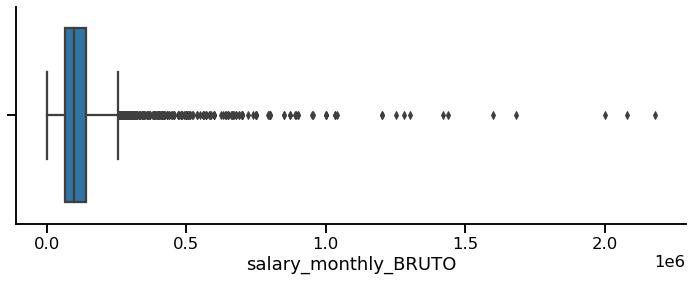

In [29]:
plt.figure(figsize=(12, 4))
seaborn.boxplot(x=df['salary_monthly_BRUTO'])
seaborn.despine()

### Se agrupan sueldos por work_role. Creemos que work_role es una variable que influye en el salario. Por ejemplo, un lider técnico gana más que un developer

In [30]:
df_lang_clean_group_by_programming_language = df.groupby(['work_role'] , as_index=False).agg({'salary_monthly_BRUTO': ['mean', 'min', 'max' , 'count']})
df_lang_clean_group_by_programming_language

work_role salary_monthly_BRUTO  \
                                                                       mean   
0                                   buyer / commercial            140000.00   
1                                                    ,             40000.00   
2                        AV Technical Leader - Support             80300.00   
3                            Access Management Analyst             52400.00   
4                                      Account manager             45000.00   
..                                                 ...                  ...   
257                                  technical analyst             60000.00   
258                                            tecnico             20000.00   
259                                todos los de arriba            180000.00   
260  trabajo como desarrollador back, pero también ...             66714.38   
261                                  técnico reparador             43500.00   

                                 
           min        max count  
0    140000.00  140000.00     1  
1     40000.00   40000.00     1  
2     80300.00   80300.00     1  
3     52400.00   52400.00     1  
4     45000.00   45000.00     1  
..         ...        ...   ...  
257   60000.00   60000.00     1  
258   20000.00   20000.00     1  
259  180000.00  180000.00     1  
260   66714.38   66714.38     1  
261   43500.00   43500.00     1  

[262 rows x 5 columns]

### Ordenamos la agrupación de work_role por cantidades. Se puede observar que el rol Developer es el más común

In [31]:
df_lang_clean_group_by_programming_language.sort_values(by=[('salary_monthly_BRUTO' , 'count')],ascending = False)[:30]

work_role salary_monthly_BRUTO                       \
                                                    mean       min        max   
67                        Developer        125844.820224    1000.0  2180000.0   
203         SysAdmin / DevOps / SRE        128421.860443   25000.0  1680000.0   
211                Technical Leader        195412.674333   17000.0  2080000.0   
154                     QA / Tester        103261.054715   25000.0  1033000.0   
92                         HelpDesk         61687.315593   14000.0   508252.0   
28                        Architect        194177.896552   11970.0  1439100.0   
49                       Consultant        100390.171556   15000.0   700000.0   
36        BI Analyst / Data Analyst         93509.012652     266.0   271802.0   
58   Data Scientist / Data Engineer        162143.598485   23000.0  1200000.0   
134                      Networking         97903.634836   30000.0  1200000.0   
40                 Business Analyst        102318.447500   37800.0   381000.0   
229                              UX         94233.734043    2000.0   392000.0   
106                         Infosec        124044.573171   43930.0   312100.0   
161                  Recruiter / HR         99292.277778   12000.0   200000.0   
54                              DBA        161598.058824   26000.0  1250000.0   
63                         Designer         69699.152174   13300.0   190000.0   
167               Sales / Pre-Sales        157545.115385   18073.0  1000000.0   
127                      Middleware        115586.363636   36000.0   210000.0   
201                Storage / Backup         97600.000000   57000.0   145000.0   
131                             NLP        100233.000000   77000.0   118337.0   
188               Software Engineer        171000.000000  122000.0   250000.0   
64                           DevOps        190500.000000   85000.0   325000.0   
11               Analista Funcional         75525.000000   45000.0   101000.0   
82               Functional Analyst         99333.333333   60000.0   133000.0   
19               Analista funcional         64500.000000   45000.0    84000.0   
190               Software engineer         93800.000000   75000.0   112600.0   
220              Telecomunicaciones         86000.000000   62000.0   110000.0   
81                        Funcional         65500.000000   55000.0    76000.0   
46                   Cloud Engineer        107500.000000  100000.0   115000.0   
122                      Maquetador         36205.000000   36205.0    36205.0   

           
    count  
67   2231  
203   655  
211   390  
154   246  
92    177  
28    174  
49    135  
36    132  
58    132  
134   122  
40    108  
229    94  
106    82  
161    54  
54     51  
63     46  
167    26  
127    22  
201    10  
131     6  
188     5  
64      4  
11      4  
82      3  
19      2  
190     2  
220     2  
81      2  
46      2  
122     2

### Se observa que la varialbe work_role influyen en el salario, es por ello que la agregaos a las columnas relevantes.

In [32]:

relevant_columns = ['tools_programming_languages', 'salary_monthly_NETO' ,'salary_monthly_BRUTO', 'work_role']

### Conteo de frecuencias de los lenguajes de programación

La columna que contiene información sobre los lenguajes de programación utilizados es `tools_programming_languages`. Sus valores son strings con los lenguajes seleccionados separados por comas.



In [33]:
df.tools_programming_languages[:3]

0                     Ninguno
1    HTML, Javascript, Python
2                     Ninguno
Name: tools_programming_languages, dtype: object

### En el data set se encontro 'Ninguno' como lenguaje de programación. Se eliminan las filas que tienen como lenguaje a 'Ninguno'

In [34]:
df = df[df['tools_programming_languages'] != 'Ninguno']

### Se eliminan las filas que  estan fuera de la franja  para trabajar. Dejamos los filas que se encuentre entre 18 y 65

In [35]:
edad_limite_inferior = 18
edad_limite_superior = 65

rows_to_delete = df[(df.profile_age <= edad_limite_inferior) | (df.profile_age >= edad_limite_superior ) ].index
df_age_cleaned = df.drop(rows_to_delete)

Las siguientes celdas de código separan estos lenguajes de programación y cuentan la frecuencia con la que aparecen.

No es necesario entender este código en profundidad, aunque sí es un buen ejercicio.

Conteo de frecuencias de los lenguajes de programación

La columna que contiene información sobre los lenguajes de programación utilizados es tools_programming_languages. Sus valores son strings con los lenguajes seleccionados separados por comas.

Las siguientes celdas de código separan estos lenguajes de programación y cuentan la frecuencia con la que aparecen.

No es necesario entender este código en profundidad, aunque sí es un buen ejercicio.


In [36]:
# Convert the comma-separated string of languages to a list of string.
# Remove 'ninguno de los anteriores' option, spaces and training commas.
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Remove 'other' option
  languages_str = languages_str.lower()\
    .replace('ninguno de los anteriores', '')
  # Split string into list of items
  # Remove spaces and commas for each item
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]

# Create a new column with the list of languages
df.loc[:, 'cured_programming_languages'] = df.tools_programming_languages\
    .apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages') 



In [37]:
# Duplicate each row of df for each programming language
# mentioned in the response.
# We only include in df_lang the columns we are going to analyze later, so we
# don't duplicate innecesary information.

def duplicate_rows(df, relevant_columns):

    df_lang = df.cured_programming_languages\
        .apply(pd.Series).stack()\
        .reset_index(level=-1, drop=True).to_frame()\
        .join(df[relevant_columns])\
        .rename(columns={0: 'programming_language'})
    # Horrible programming style! But a lot of data science code can be written with
    # as concatenations of functions (pipelines), and there's no elegant way of
    # doing that on Python.
    
    return df_lang


### Se generan dos data frames

- df_lang: Con este DF se trabaja en la parte 1 del entregable.
- df_lang_part_2: Con este DF se trabaja  en la parte 2 del entregable

### En este punto ambos dataframes tienen las mismas filas

In [38]:
df_lang = duplicate_rows(df, relevant_columns)
df_lang[:5]

,programming_language,tools_programming_languages,salary_monthly_NETO,salary_monthly_BRUTO,work_role,cured_programming_languages
1,html,"HTML, Javascript, Python",63000.0,79000.0,Developer,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.0,79000.0,Developer,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",63000.0,79000.0,Developer,"[html, javascript, python]"
3,bash/shell,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,130000.0,SysAdmin / DevOps / SRE,"[bash/shell, c, css, html, java, javascript, p..."
3,c,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,130000.0,SysAdmin / DevOps / SRE,"[bash/shell, c, css, html, java, javascript, p..."


In [39]:
cloumns_part_2 = relevant_columns + ['profile_studies_level_state','profile_studies_level', 'profile_years_experience', 'work_years_in_company' , 'work_years_in_current_position' , 'work_people_in_charge_of' , 'profile_gender' , 'salary_percentage_inflation_adjustment_2020' ]

df_lang_part_2 = duplicate_rows(df, cloumns_part_2)
df_lang_part_2[:5]

,programming_language,tools_programming_languages,salary_monthly_NETO,salary_monthly_BRUTO,work_role,cured_programming_languages,profile_studies_level_state,profile_studies_level,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_gender,salary_percentage_inflation_adjustment_2020
1,html,"HTML, Javascript, Python",63000.0,79000.0,Developer,"[html, javascript, python]",En curso,Universitario,5.0,2.0,2.0,4,Hombre,10.0
1,javascript,"HTML, Javascript, Python",63000.0,79000.0,Developer,"[html, javascript, python]",En curso,Universitario,5.0,2.0,2.0,4,Hombre,10.0
1,python,"HTML, Javascript, Python",63000.0,79000.0,Developer,"[html, javascript, python]",En curso,Universitario,5.0,2.0,2.0,4,Hombre,10.0
3,bash/shell,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,130000.0,SysAdmin / DevOps / SRE,"[bash/shell, c, css, html, java, javascript, p...",Incompleto,Posgrado,15.0,15.0,13.0,5,Hombre,0.0
3,c,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,130000.0,SysAdmin / DevOps / SRE,"[bash/shell, c, css, html, java, javascript, p...",Incompleto,Posgrado,15.0,15.0,13.0,5,Hombre,0.0


En la columna `programming_language` se encuentra cada lenguaje por separado. Notar que si una respuesta contenía 3 lenguajes, como `"HTML, Javascript, Python"`, la fila ha sido replicada 3 veces. Por ello, hay tres filas con índice 1.

In [40]:
language_count = df_lang.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})
language_count[:10]

,language,frequency
0,javascript,2191
1,sql,1844
2,html,1604
3,python,1267
4,java,1235
5,css,1108
6,bash/shell,880
7,php,712
8,typescript,702
9,.net,697


### Se calcula el % que tiene cada lenguaje respecto al total del lenguajes. Se los ordena por orden de popularidad.

In [41]:
total_lenguajes = language_count['frequency'].sum()
language_count['porc'] = ((language_count['frequency'] / total_lenguajes).round(4)) * 100
language_count

,language,frequency,porc
0,javascript,2191,14.41
1,sql,1844,12.13
2,html,1604,10.55
3,python,1267,8.33
4,java,1235,8.12
...,...,...,...
189,programación,1,0.01
190,del,1,0.01
191,jbase,1,0.01
192,nativescrip,1,0.01


## Filtrado de lenguajes relevantes

El siguiente código permite seleccionar sólo las filas donde el valor de la columna `programming_language` se encuentre en la lista `interesting_languages`.

### Se buscan los lenguajes cuyas frecuencias totalicen el 90% de la muestra.

In [42]:

index = 1 
porc_target = 95
while language_count[:index]['porc'].sum()  <= porc_target:
    print(" Indice :" , index , " Total %" ,  language_count[:index]['porc'].sum() , end = "")
    index = index + 1



 Indice : 1  Total % 14.41 Indice : 2  Total % 26.54 Indice : 3  Total % 37.089999999999996 Indice : 4  Total % 45.419999999999995 Indice : 5  Total % 53.53999999999999 Indice : 6  Total % 60.82999999999999 Indice : 7  Total % 66.61999999999999 Indice : 8  Total % 71.3 Indice : 9  Total % 75.92 Indice : 10  Total % 80.5 Indice : 11  Total % 84.67 Indice : 12  Total % 86.41 Indice : 13  Total % 87.8 Indice : 14  Total % 89.17 Indice : 15  Total % 90.45 Indice : 16  Total % 91.56 Indice : 17  Total % 92.54 Indice : 18  Total % 93.34 Indice : 19  Total % 94.0 Indice : 20  Total % 94.59


Indicar que se toman los lenguajes más representativos en base al punto de inflexión que se observa en el gráfico

 Hallazgo interesante: Tanto visualmente como porcentualmente, se llega a la misma 
conclusión que es tomar los 15 lenguajes más  frecuentes. 
El en gráfico se puede observar como a partir del lenguaje en la ubicación 20 (lenguaje R), la curva de frecuencias absolutas se 'desploma'

### Se grafica la frencuencia de los lenguajes. Los lenguajes están ordenados de manera decreciente, según su frencuencia. En el eje de las abscisas se muetra la frencuencia de lenguajes.

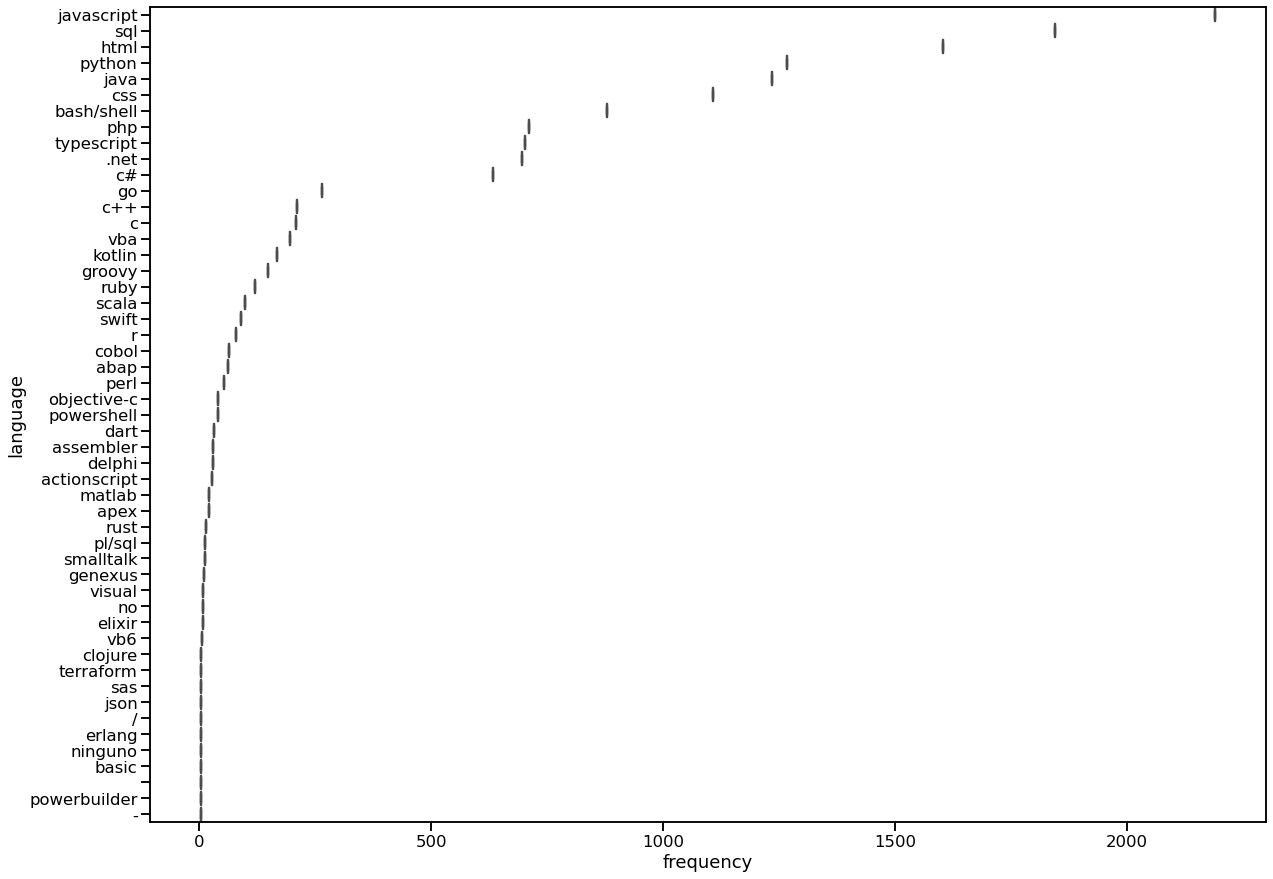

In [43]:
plt.figure(figsize=(20, 15))
over_limit = 30
seaborn.boxplot(data=language_count[:index], y=language_count.language[:index + over_limit], x=language_count.frequency,
                 color='orangered')
plt.ticklabel_format(style='plain', axis='x')

In [44]:
language_count[:index]

,language,frequency,porc
0,javascript,2191,14.41
1,sql,1844,12.13
2,html,1604,10.55
3,python,1267,8.33
4,java,1235,8.12
5,css,1108,7.29
6,bash/shell,880,5.79
7,php,712,4.68
8,typescript,702,4.62
9,.net,697,4.58


 ### Se ha observado que tanto gráficamente como numéricamente, los 20 primeros lenguajes totalizan el 95% de la muestra. Se observar que el 5% restante tiene escasa reprensentatividad.
 
### En gráfico se puede observar como a partir del lenguaje en la ubicación 20 (lenguaje R), la curva de frecuencias se hace prácticamente vertical 

In [45]:
interesting_languages  =language_count[:index]['language'].values
interesting_languages

array(['javascript', 'sql', 'html', 'python', 'java', 'css', 'bash/shell',
       'php', 'typescript', '.net', 'c#', 'go', 'c++', 'c', 'vba',
       'kotlin', 'groovy', 'ruby', 'scala', 'swift', 'r'], dtype=object)

In [46]:
# Filter out languages that we want to exclude
# Complete here with your selected list.
#interesting_languages = ["python"]

def filter_intresting_languages(df_lang,intresting_languages):
    
    filtered_df_lang = df_lang[df_lang.programming_language.isin(interesting_languages)]

    return filtered_df_lang

In [47]:
filtered_df_lang = filter_intresting_languages(df_lang,interesting_languages)
filtered_df_lang[:5]


,programming_language,tools_programming_languages,salary_monthly_NETO,salary_monthly_BRUTO,work_role,cured_programming_languages
1,html,"HTML, Javascript, Python",63000.0,79000.0,Developer,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.0,79000.0,Developer,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",63000.0,79000.0,Developer,"[html, javascript, python]"
3,bash/shell,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,130000.0,SysAdmin / DevOps / SRE,"[bash/shell, c, css, html, java, javascript, p..."
3,c,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,130000.0,SysAdmin / DevOps / SRE,"[bash/shell, c, css, html, java, javascript, p..."


### Se prepara este dataframe para la parte el Ejercicio 2.

In [48]:
filtered_df_lang_part_2 = filter_intresting_languages(df_lang_part_2,interesting_languages)
filtered_df_lang_part_2[:5]

,programming_language,tools_programming_languages,salary_monthly_NETO,salary_monthly_BRUTO,work_role,cured_programming_languages,profile_studies_level_state,profile_studies_level,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_gender,salary_percentage_inflation_adjustment_2020
1,html,"HTML, Javascript, Python",63000.0,79000.0,Developer,"[html, javascript, python]",En curso,Universitario,5.0,2.0,2.0,4,Hombre,10.0
1,javascript,"HTML, Javascript, Python",63000.0,79000.0,Developer,"[html, javascript, python]",En curso,Universitario,5.0,2.0,2.0,4,Hombre,10.0
1,python,"HTML, Javascript, Python",63000.0,79000.0,Developer,"[html, javascript, python]",En curso,Universitario,5.0,2.0,2.0,4,Hombre,10.0
3,bash/shell,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,130000.0,SysAdmin / DevOps / SRE,"[bash/shell, c, css, html, java, javascript, p...",Incompleto,Posgrado,15.0,15.0,13.0,5,Hombre,0.0
3,c,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,130000.0,SysAdmin / DevOps / SRE,"[bash/shell, c, css, html, java, javascript, p...",Incompleto,Posgrado,15.0,15.0,13.0,5,Hombre,0.0


#### Se crea un dataframe agrupado por 'programming_language' y luego se visualiza por diferentes criterios de orden

In [49]:
filtered_df_lang_group_by_programming_language = filtered_df_lang.groupby(['programming_language'] , as_index=False).agg({'salary_monthly_BRUTO': ['mean', 'min', 'max' , 'count']})
filtered_df_lang_group_by_programming_language

programming_language salary_monthly_BRUTO                          
                                        mean      min        max count
0                  .net        118420.878178   1000.0  1033000.0   697
1            bash/shell        150849.642557  11300.0  2080000.0   880
2                     c        150173.979615   1000.0  2080000.0   208
3                    c#        119838.884748   1000.0  1680000.0   634
4                   c++        136085.491792   1000.0  1680000.0   212
5                   css        121445.135993   1000.0  2080000.0  1108
6                    go        196139.832906  40000.0  1600000.0   265
7                groovy        151794.267383  22610.0   440000.0   149
8                  html        120856.082544   1000.0  2080000.0  1604
9                  java        135059.628842   1000.0  2180000.0  1235
10           javascript        133282.659283   1000.0  2180000.0  2191
11               kotlin        187825.335799   1000.0  2180000.0   169
12                  php        118243.190407   1000.0   798000.0   712
13               python        145961.304365   1000.0  1680000.0  1267
14                    r        151293.641013   1000.0  1000000.0    79
15                 ruby        231834.859587  30000.0  2080000.0   121
16                scala        219115.300000  11970.0  1000000.0   100
17                  sql        121939.794604   1000.0  2180000.0  1844
18                swift        210607.111111  50000.0  2000000.0    90
19           typescript        153906.756097  17000.0  2180000.0   702
20                  vba        103367.600359  26890.0   750000.0   195

In [50]:
filtered_df_lang_group_by_programming_language.sort_values(by=[('salary_monthly_BRUTO' , 'count')],ascending = False)[:]

programming_language salary_monthly_BRUTO                          
                                        mean      min        max count
10           javascript        133282.659283   1000.0  2180000.0  2191
17                  sql        121939.794604   1000.0  2180000.0  1844
8                  html        120856.082544   1000.0  2080000.0  1604
13               python        145961.304365   1000.0  1680000.0  1267
9                  java        135059.628842   1000.0  2180000.0  1235
5                   css        121445.135993   1000.0  2080000.0  1108
1            bash/shell        150849.642557  11300.0  2080000.0   880
12                  php        118243.190407   1000.0   798000.0   712
19           typescript        153906.756097  17000.0  2180000.0   702
0                  .net        118420.878178   1000.0  1033000.0   697
3                    c#        119838.884748   1000.0  1680000.0   634
6                    go        196139.832906  40000.0  1600000.0   265
4                   c++        136085.491792   1000.0  1680000.0   212
2                     c        150173.979615   1000.0  2080000.0   208
20                  vba        103367.600359  26890.0   750000.0   195
11               kotlin        187825.335799   1000.0  2180000.0   169
7                groovy        151794.267383  22610.0   440000.0   149
15                 ruby        231834.859587  30000.0  2080000.0   121
16                scala        219115.300000  11970.0  1000000.0   100
18                swift        210607.111111  50000.0  2000000.0    90
14                    r        151293.641013   1000.0  1000000.0    79

In [51]:
filtered_df_lang_group_by_programming_language.sort_values(by=[('salary_monthly_BRUTO' , 'mean')],ascending = False)[:]

programming_language salary_monthly_BRUTO                          
                                        mean      min        max count
15                 ruby        231834.859587  30000.0  2080000.0   121
16                scala        219115.300000  11970.0  1000000.0   100
18                swift        210607.111111  50000.0  2000000.0    90
6                    go        196139.832906  40000.0  1600000.0   265
11               kotlin        187825.335799   1000.0  2180000.0   169
19           typescript        153906.756097  17000.0  2180000.0   702
7                groovy        151794.267383  22610.0   440000.0   149
14                    r        151293.641013   1000.0  1000000.0    79
1            bash/shell        150849.642557  11300.0  2080000.0   880
2                     c        150173.979615   1000.0  2080000.0   208
13               python        145961.304365   1000.0  1680000.0  1267
4                   c++        136085.491792   1000.0  1680000.0   212
9                  java        135059.628842   1000.0  2180000.0  1235
10           javascript        133282.659283   1000.0  2180000.0  2191
17                  sql        121939.794604   1000.0  2180000.0  1844
5                   css        121445.135993   1000.0  2080000.0  1108
8                  html        120856.082544   1000.0  2080000.0  1604
3                    c#        119838.884748   1000.0  1680000.0   634
0                  .net        118420.878178   1000.0  1033000.0   697
12                  php        118243.190407   1000.0   798000.0   712
20                  vba        103367.600359  26890.0   750000.0   195

In [52]:
filtered_df_lang_group_by_programming_language.sort_values(by=[('salary_monthly_BRUTO' , 'max')],ascending = False)[:]

programming_language salary_monthly_BRUTO                          
                                        mean      min        max count
10           javascript        133282.659283   1000.0  2180000.0  2191
19           typescript        153906.756097  17000.0  2180000.0   702
9                  java        135059.628842   1000.0  2180000.0  1235
11               kotlin        187825.335799   1000.0  2180000.0   169
17                  sql        121939.794604   1000.0  2180000.0  1844
15                 ruby        231834.859587  30000.0  2080000.0   121
2                     c        150173.979615   1000.0  2080000.0   208
5                   css        121445.135993   1000.0  2080000.0  1108
8                  html        120856.082544   1000.0  2080000.0  1604
1            bash/shell        150849.642557  11300.0  2080000.0   880
18                swift        210607.111111  50000.0  2000000.0    90
3                    c#        119838.884748   1000.0  1680000.0   634
4                   c++        136085.491792   1000.0  1680000.0   212
13               python        145961.304365   1000.0  1680000.0  1267
6                    go        196139.832906  40000.0  1600000.0   265
0                  .net        118420.878178   1000.0  1033000.0   697
16                scala        219115.300000  11970.0  1000000.0   100
14                    r        151293.641013   1000.0  1000000.0    79
12                  php        118243.190407   1000.0   798000.0   712
20                  vba        103367.600359  26890.0   750000.0   195
7                groovy        151794.267383  22610.0   440000.0   149

In [53]:
#Esta funcion devuelve 3 dataframes 
# outliers_inferiores: Son los valores que perforan el limite inferior 
# filtered: Son los valores que quedan dentro del rango RIC
# outliers_superiores: Son los valores que perforan el limite superior

def remove_outliers (laguange,filtered_df_lang): 
    
    result = filtered_df_lang[filtered_df_lang.programming_language == laguange]['salary_monthly_BRUTO'].describe()
    RIC = result[6] - result[4]
    Ls = result[6] + RIC * 1.5
    Li = result[4] - RIC * 1.5

    filtered = filtered_df_lang[(filtered_df_lang.programming_language == laguange ) &  (filtered_df_lang.salary_monthly_BRUTO <= Ls) &  (filtered_df_lang.salary_monthly_BRUTO >= Li) ] 
    outliers_superiores = filtered_df_lang[(filtered_df_lang.programming_language == laguange ) &  (filtered_df_lang.salary_monthly_BRUTO >= Ls)] 
    outliers_inferiores = filtered_df_lang[(filtered_df_lang.programming_language == laguange ) &  (filtered_df_lang.salary_monthly_BRUTO <= Li)] 
    
    return (outliers_inferiores,filtered,outliers_superiores)

In [54]:
# Esta funcion crea un data frame con todos los leguajes especificados en interesting_languages
# en el data frame filtered_df_lang. El nuevo data frame generado, tiene eliminados los outliers inferiores y superiores


def create_df_no_outliers_interesting_languages(interesting_languages , filtered_df_lang):
    filtered_data_frames = []

    for language in interesting_languages:
        _,tmp,_ = remove_outliers (language, filtered_df_lang)
        filtered_data_frames.append(tmp)

    tmp = pd.concat(filtered_data_frames, axis=0)
    
    return tmp


In [55]:
df_no_outliers_interesting_languages = create_df_no_outliers_interesting_languages(interesting_languages , filtered_df_lang)

In [56]:
# Este dataframe se prepara para el Ejercicio 2
df_no_outliers_interesting_languages_part_2 = create_df_no_outliers_interesting_languages(interesting_languages , filtered_df_lang_part_2)

In [57]:
df_no_outliers_interesting_languages.shape[0]

13476

In [58]:
df_no_outliers_interesting_languages.describe()

,salary_monthly_NETO,salary_monthly_BRUTO
count,13476.000000,13476.000000
mean,84595.137617,109027.474219
std,40229.987640,55538.824405
min,1000.000000,1000.000000
25%,56000.000000,67000.000000
50%,80000.000000,100000.000000
75%,105000.000000,140000.000000
max,460000.000000,480000.000000


### Se grafica la curva de distribución de los lenguajes, una vez eliminados los outlayers.

<AxesSubplot:xlabel='salary_monthly_BRUTO', ylabel='Count'>

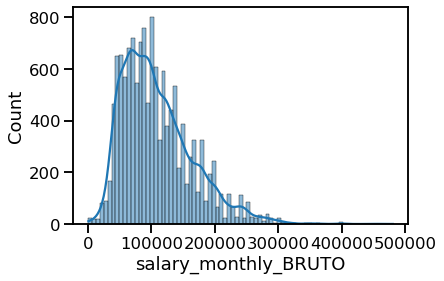

In [59]:
seaborn.histplot(df_no_outliers_interesting_languages['salary_monthly_BRUTO'] , kde=True)

In [60]:
df_no_outliers_interesting_languages_group_by_programming_language = df_no_outliers_interesting_languages.groupby(['programming_language'] , as_index=False).agg({'salary_monthly_BRUTO': ['mean', 'min', 'max' , 'count']})
df_no_outliers_interesting_languages_group_by_programming_language

programming_language salary_monthly_BRUTO                         
                                        mean      min       max count
0                  .net        101178.412258   1000.0  240000.0   660
1            bash/shell        119800.531200  11300.0  303689.0   817
2                     c        109123.496126   1000.0  300000.0   191
3                    c#         98158.113249   1000.0  230000.0   591
4                   c++         97564.739795   1000.0  268400.0   195
5                   css         96217.342101   1000.0  244000.0  1028
6                    go        156470.148216  40000.0  350000.0   241
7                groovy        143405.179444  22610.0  350000.0   144
8                  html         96174.830344   1000.0  240000.0  1483
9                  java        119307.408808   1000.0  293995.0  1183
10           javascript        105742.724193   1000.0  270000.0  2025
11               kotlin        153897.973101   1000.0  360000.0   158
12                  php         94653.521113   1000.0  240000.0   656
13               python        120660.462464   1000.0  307000.0  1181
14                    r        109366.523429   1000.0  271802.0    70
15                 ruby        163202.550550  30000.0  480000.0   109
16                scala        177244.891304  11970.0  342500.0    92
17                  sql        101001.563847   1000.0  250000.0  1739
18                swift        157863.132530  50000.0  400500.0    83
19           typescript        116876.341273  17000.0  300000.0   644
20                  vba         90750.978871  26890.0  207000.0   186

In [61]:
df_no_outliers_interesting_languages_group_by_programming_language.sort_values(by=[('salary_monthly_BRUTO' , 'count')],ascending = False)[:]

programming_language salary_monthly_BRUTO                         
                                        mean      min       max count
10           javascript        105742.724193   1000.0  270000.0  2025
17                  sql        101001.563847   1000.0  250000.0  1739
8                  html         96174.830344   1000.0  240000.0  1483
9                  java        119307.408808   1000.0  293995.0  1183
13               python        120660.462464   1000.0  307000.0  1181
5                   css         96217.342101   1000.0  244000.0  1028
1            bash/shell        119800.531200  11300.0  303689.0   817
0                  .net        101178.412258   1000.0  240000.0   660
12                  php         94653.521113   1000.0  240000.0   656
19           typescript        116876.341273  17000.0  300000.0   644
3                    c#         98158.113249   1000.0  230000.0   591
6                    go        156470.148216  40000.0  350000.0   241
4                   c++         97564.739795   1000.0  268400.0   195
2                     c        109123.496126   1000.0  300000.0   191
20                  vba         90750.978871  26890.0  207000.0   186
11               kotlin        153897.973101   1000.0  360000.0   158
7                groovy        143405.179444  22610.0  350000.0   144
15                 ruby        163202.550550  30000.0  480000.0   109
16                scala        177244.891304  11970.0  342500.0    92
18                swift        157863.132530  50000.0  400500.0    83
14                    r        109366.523429   1000.0  271802.0    70

In [62]:
df_no_outliers_interesting_languages_group_by_programming_language.sort_values(by=[('salary_monthly_BRUTO' , 'mean')],ascending = False)[:]

programming_language salary_monthly_BRUTO                         
                                        mean      min       max count
16                scala        177244.891304  11970.0  342500.0    92
15                 ruby        163202.550550  30000.0  480000.0   109
18                swift        157863.132530  50000.0  400500.0    83
6                    go        156470.148216  40000.0  350000.0   241
11               kotlin        153897.973101   1000.0  360000.0   158
7                groovy        143405.179444  22610.0  350000.0   144
13               python        120660.462464   1000.0  307000.0  1181
1            bash/shell        119800.531200  11300.0  303689.0   817
9                  java        119307.408808   1000.0  293995.0  1183
19           typescript        116876.341273  17000.0  300000.0   644
14                    r        109366.523429   1000.0  271802.0    70
2                     c        109123.496126   1000.0  300000.0   191
10           javascript        105742.724193   1000.0  270000.0  2025
0                  .net        101178.412258   1000.0  240000.0   660
17                  sql        101001.563847   1000.0  250000.0  1739
3                    c#         98158.113249   1000.0  230000.0   591
4                   c++         97564.739795   1000.0  268400.0   195
5                   css         96217.342101   1000.0  244000.0  1028
8                  html         96174.830344   1000.0  240000.0  1483
12                  php         94653.521113   1000.0  240000.0   656
20                  vba         90750.978871  26890.0  207000.0   186

In [63]:
df_no_outliers_interesting_languages_group_by_programming_language.columns = [''.join(col).strip() for col in df_no_outliers_interesting_languages_group_by_programming_language.columns.values]

df_no_outliers_interesting_languages_group_by_programming_language['porc'] = (100 * df_no_outliers_interesting_languages_group_by_programming_language['salary_monthly_BRUTOcount'] / df_no_outliers_interesting_languages_group_by_programming_language['salary_monthly_BRUTOcount'].sum()).round(2)

df_no_outliers_interesting_languages_group_by_programming_language

,programming_language,salary_monthly_BRUTOmean,salary_monthly_BRUTOmin,salary_monthly_BRUTOmax,salary_monthly_BRUTOcount,porc
0,.net,101178.412258,1000.0,240000.0,660,4.90
1,bash/shell,119800.531200,11300.0,303689.0,817,6.06
2,c,109123.496126,1000.0,300000.0,191,1.42
3,c#,98158.113249,1000.0,230000.0,591,4.39
4,c++,97564.739795,1000.0,268400.0,195,1.45
5,css,96217.342101,1000.0,244000.0,1028,7.63
6,go,156470.148216,40000.0,350000.0,241,1.79
7,groovy,143405.179444,22610.0,350000.0,144,1.07
8,html,96174.830344,1000.0,240000.0,1483,11.00
9,java,119307.408808,1000.0,293995.0,1183,8.78


In [64]:
df_no_outliers_interesting_languages_group_by_programming_language.sort_values(by=[('porc')],ascending = False)[['programming_language', 'porc'] ]

,programming_language,porc
10,javascript,15.03
17,sql,12.90
8,html,11.00
9,java,8.78
13,python,8.76
5,css,7.63
1,bash/shell,6.06
0,.net,4.90
12,php,4.87
19,typescript,4.78


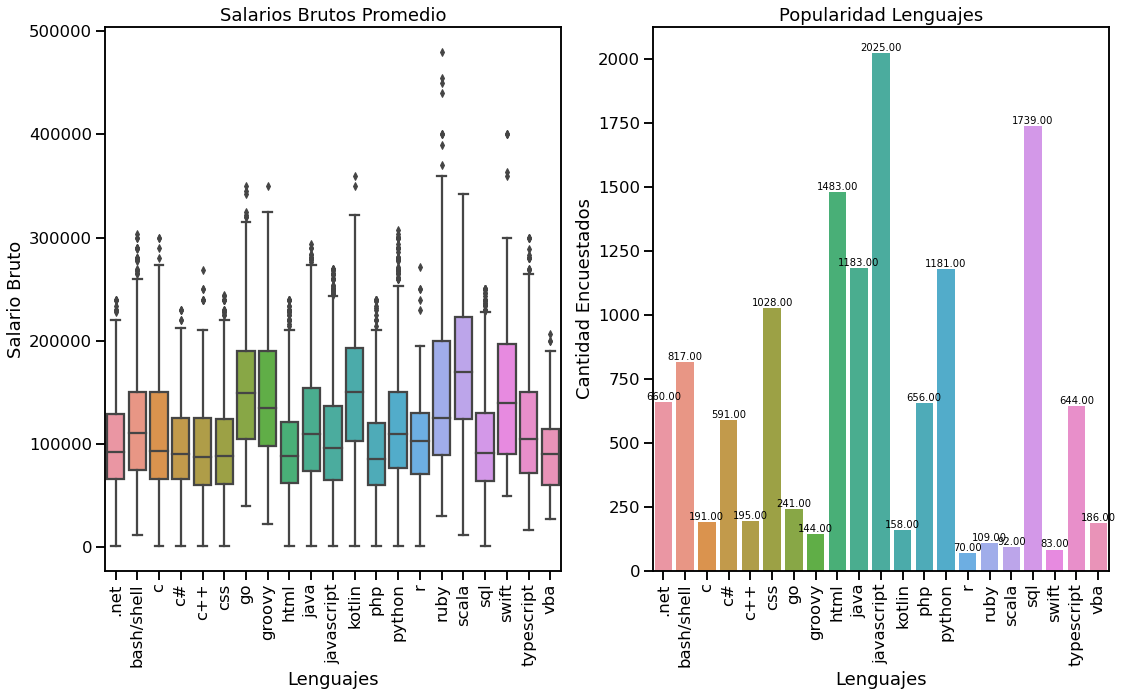

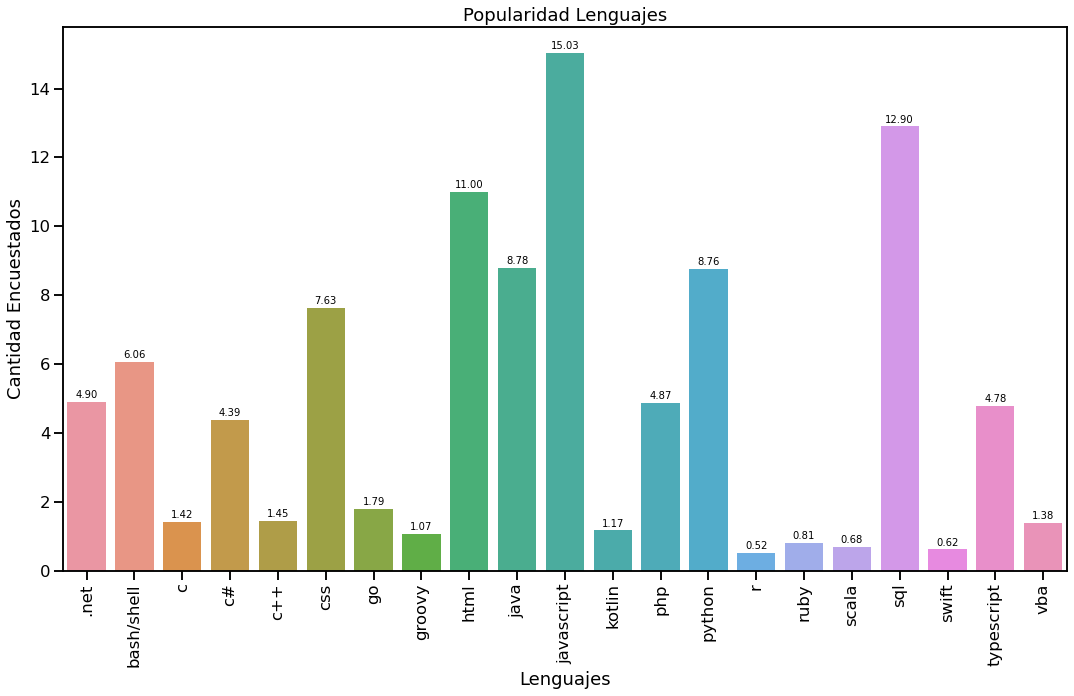

In [65]:
fig, axes = plt.subplots(1, 2 , figsize=(18, 10))



seaborn.boxplot(ax = axes[0] , x="programming_language", y="salary_monthly_BRUTO", data=df_no_outliers_interesting_languages.sort_values('programming_language'))
axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=90)
axes[0].set_xlabel('Lenguajes')
axes[0].set_ylabel('Salario Bruto')
axes[0].set_title('Salarios Brutos Promedio')



seaborn.barplot(ax = axes[1] , x="programming_language", y="salary_monthly_BRUTOcount", data=df_no_outliers_interesting_languages_group_by_programming_language.sort_values('programming_language'))
axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation=90)
axes[1].set_xlabel('Lenguajes')
axes[1].set_ylabel('Cantidad Encuestados')
axes[1].set_title('Popularidad Lenguajes')

genericPlot(axes[1] , 20)




#graph = seaborn.factorplot(ax = axes[0] , x ='programming_language', y ='porc', kind="bar", data = df_no_outliers_interesting_languages_group_by_programming_language.sort_values('programming_language'))
#graph.set_xticklabels(axes[0].get_xticklabels(),rotation=90)

fig, axes = plt.subplots(1, 1 , figsize=(18, 10))

#seaborn.histplot(ax = axes, data = df_no_outliers_interesting_languages_group_by_programming_language.sort_values('programming_language'), y="porc" , x = 'programming_language' )


seaborn.barplot(ax = axes , x="programming_language", y="porc", data=df_no_outliers_interesting_languages_group_by_programming_language.sort_values('programming_language'))
axes.set_xticklabels(axes.get_xticklabels(),rotation=90)
axes.set_xlabel('Lenguajes')
axes.set_ylabel('Cantidad Encuestados')
axes.set_title('Popularidad Lenguajes')

genericPlot(axes , 0.2)



In [66]:
df_conc = df_no_outliers_interesting_languages_group_by_programming_language
frecuencia_acumulada_populares = 0

def calcular_frec_acumulada(lista_lenguajes, df):
    d = 0 
    for x in lista_lenguajes:
         d = d + df[df['programming_language'] == x].porc.values
    return d

frecuencia_acumulada_populares = calcular_frec_acumulada(['javascript', 'sql', 'html', 'java', 'python','css' , 'bash/shell' ] , df_conc)
frecuencia_acumulada_mayor_sueldo = calcular_frec_acumulada(['scala', 'ruby', 'swift', 'go', 'kotlin','groovy' , 'vba'] , df_conc)

print (f"frecuencia_acumulada_populares : {frecuencia_acumulada_populares}, frecuencia_acumulada_mayor_sueldo {frecuencia_acumulada_mayor_sueldo}")

frecuencia_acumulada_populares : [70.16], frecuencia_acumulada_mayor_sueldo [7.52]



### Se observa 
- Los lenguajes scala, ruby, swift, go, kotlin, groovy y bash/shell son los lenguajes mejores pagos en promedio.
- Los lenguajes javascript, sql, html, java, python, css y vba son los de mayor frecuencia.


### Conclusión: 

### Si bien los lenguajes scala, ruby, swift, go, kotlin, groovy y vba  son los lenguajes de programación asociados a los mejores salarios promedios, se advierte que a la vez tienen baja frecuencia, lo que implica un estimador menos robusto. Es por ello que los lenguajes javascript, sql, html, java, python, css y bash/shell, que son los que presetan mayor frecuencia (y por ende estimadores más robustos) serían los lenguajes asociados a los mejores salarios. 

# Ejercicio 2 - Densidades y varias varialbes

Responder a la pregunta general: **¿Que herramientas (prácticas y teóricas) són útiles para explorar la base, descubrir patrones, asociaciones?**

Para ello considere (igual al ejercicio Anterior):
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en sub-poblaciones. 

### Se utiliza el data frame f_no_outliers_interesting_languages_part_2

In [67]:
print(f"Columnas relevantes seleccionadas{df_no_outliers_interesting_languages_part_2.columns}")

Columnas relevantes seleccionadasIndex(['programming_language', 'tools_programming_languages',
       'salary_monthly_NETO', 'salary_monthly_BRUTO', 'work_role',
       'cured_programming_languages', 'profile_studies_level_state',
       'profile_studies_level', 'profile_years_experience',
       'work_years_in_company', 'work_years_in_current_position',
       'work_people_in_charge_of', 'profile_gender',
       'salary_percentage_inflation_adjustment_2020'],
      dtype='object')


### La eliminación de outlayers y limpieza de df_no_outliers_interesting_languages_part_2 Se realizón en la parte 1 del notebook

In [68]:
df_no_outliers_interesting_languages_part_2[:5]

,programming_language,tools_programming_languages,salary_monthly_NETO,salary_monthly_BRUTO,work_role,cured_programming_languages,profile_studies_level_state,profile_studies_level,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_gender,salary_percentage_inflation_adjustment_2020
1,javascript,"HTML, Javascript, Python",63000.0,79000.0,Developer,"[html, javascript, python]",En curso,Universitario,5.0,2.0,2.0,4,Hombre,10.0
3,javascript,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,130000.0,SysAdmin / DevOps / SRE,"[bash/shell, c, css, html, java, javascript, p...",Incompleto,Posgrado,15.0,15.0,13.0,5,Hombre,0.0
4,javascript,"CSS, HTML, Javascript, SQL, TypeScript",106000.0,140000.0,Developer,"[css, html, javascript, sql, typescript]",En curso,Universitario,9.0,6.0,6.0,0,Hombre,0.0
5,javascript,"Java, Javascript",44000.0,54000.0,Developer,"[java, javascript]",Incompleto,Terciario,1.0,0.0,0.0,0,Hombre,15.0
6,javascript,Javascript,62400.0,75000.0,Developer,[javascript],Incompleto,Universitario,1.0,1.0,1.0,0,Hombre,8.0


## a) Densidad conjunta

Que herramientas visuales y modelos puede utilizar para estudiar la distribución y comportamiento de sus datos? 

Elija tres variables numéricas y 2 variables categóricas. Visualice la base según varias de las variables elegidas. Puede describir de alguna forma el comportamiento de sus datos? Que herramientas utilizaría? Describa




### Distribucion y comportamiento

In [69]:

df_no_outliers_interesting_languages_part_2[:1]

,programming_language,tools_programming_languages,salary_monthly_NETO,salary_monthly_BRUTO,work_role,cured_programming_languages,profile_studies_level_state,profile_studies_level,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_gender,salary_percentage_inflation_adjustment_2020
1,javascript,"HTML, Javascript, Python",63000.0,79000.0,Developer,"[html, javascript, python]",En curso,Universitario,5.0,2.0,2.0,4,Hombre,10.0


In [70]:
scale_mapper = {"Primario":1, "Secundario":2, "Terciario":3 , "Universitario":4 , "Posgrado":5 , "Doctorado": 6  , "Posdoctorado" : 7  }
df_no_outliers_interesting_languages_part_2["profile_studies_level_ordinal"]  = df_no_outliers_interesting_languages_part_2["profile_studies_level"].replace(scale_mapper)

In [71]:
df_grouped = df.groupby(['profile_gender']).agg(['count'])

df_grouped['profile_gender'] = df_grouped.index
df_grouped.index.name = 'idx'

df_grouped[['porc']] = ((df_grouped[['profile_age']] / df.shape[0]).round(3)) * 100
df_grouped

,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,profile_career,...,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city,recalculate_salary,cured_programming_languages,profile_gender,porc
,count,count,count,count,count,count,count,count,count,count,...,count,count,count,count,count,count,count,count,,
idx,,,,,,,,,,,,,,,,,,,,,
Hombre,4218,4218,4218,4218,4218,4218,4218,4218,4218,3986,...,4218,4218,4218,4218,4217,1165,4218,4218,Hombre,85.6
Mujer,684,684,684,684,684,684,684,684,684,663,...,684,684,684,684,684,209,684,684,Mujer,13.9
Otros,28,28,28,28,28,28,28,28,28,27,...,28,28,28,28,28,6,28,28,Otros,0.6


/Users/coviedo/opt/anaconda3/envs/diplodatos-ayvd/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/coviedo/opt/anaconda3/envs/diplodatos-ayvd/lib/python3.6/site-packages/ipykernel_launcher.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator


[Text(0, 0, 'javascript'),
 Text(1, 0, 'sql'),
 Text(2, 0, 'html'),
 Text(3, 0, 'python'),
 Text(4, 0, 'java'),
 Text(5, 0, 'css'),
 Text(6, 0, 'bash/shell'),
 Text(7, 0, 'php'),
 Text(8, 0, 'typescript'),
 Text(9, 0, '.net'),
 Text(10, 0, 'c#'),
 Text(11, 0, 'go'),
 Text(12, 0, 'c++'),
 Text(13, 0, 'c'),
 Text(14, 0, 'vba'),
 Text(15, 0, 'kotlin'),
 Text(16, 0, 'groovy'),
 Text(17, 0, 'ruby'),
 Text(18, 0, 'scala'),
 Text(19, 0, 'swift'),
 Text(20, 0, 'r')]

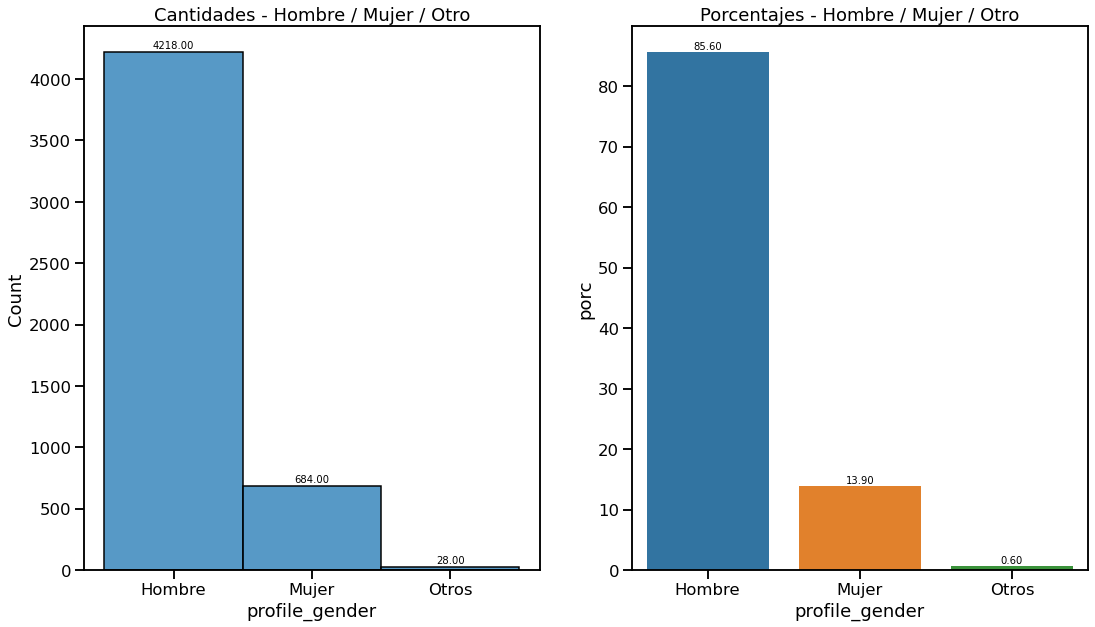

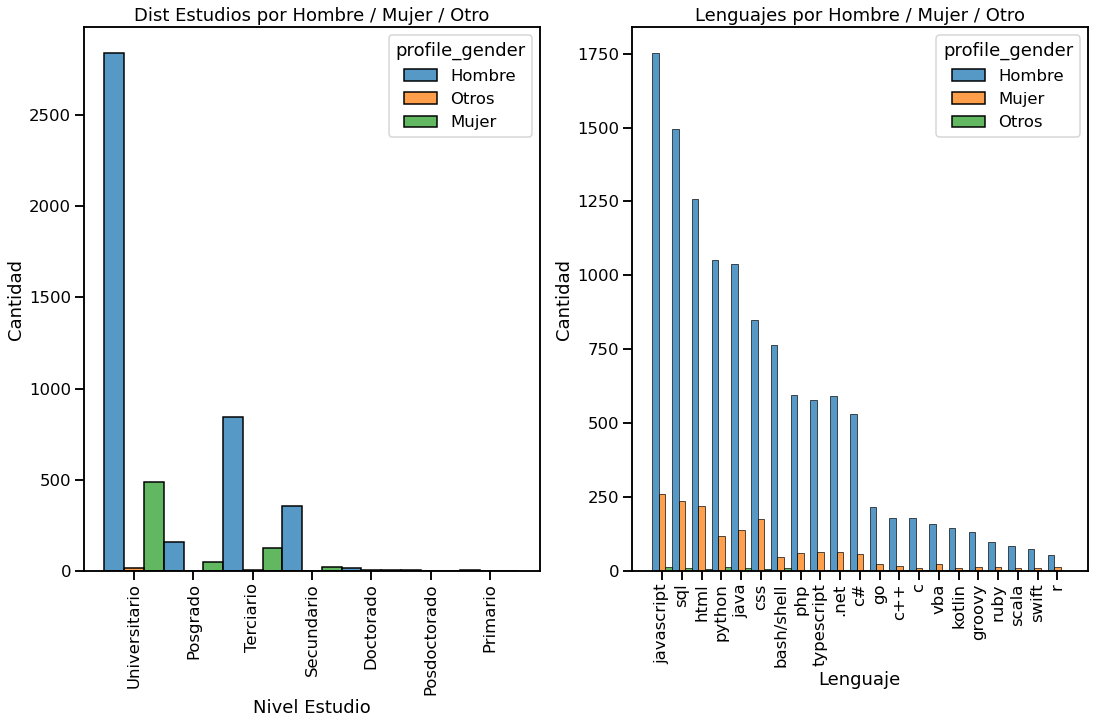

In [72]:
fig, axes = plt.subplots(1, 2 , figsize=(18, 10))

df_ordered_profile = df.sort_values(['profile_gender'])
df_grouped_ordered_profile = df_grouped.sort_values(['profile_gender'])
seaborn.histplot(ax = axes[0] ,  data = df_ordered_profile, x="profile_gender" )
seaborn.barplot(ax = axes[1], data = df_grouped_ordered_profile, x="profile_gender" , y = "porc"  )

axes[0].set_title('Cantidades - Hombre / Mujer / Otro')
axes[1].set_title('Porcentajes - Hombre / Mujer / Otro')



genericPlot(axes[0] , 55)
genericPlot(axes[1] , 1)



fig, axes = plt.subplots(1, 2 , figsize=(18, 10))


seaborn.histplot(ax = axes[0], data = df, x="profile_studies_level" , hue="profile_gender"  , multiple="dodge")
seaborn.histplot(ax = axes[1], data = df_no_outliers_interesting_languages_part_2, x="programming_language" , hue="profile_gender"  , multiple="dodge")

axes[0].set_title('Dist Estudios por Hombre / Mujer / Otro')
axes[0].set_ylabel('Cantidad')
axes[0].set_xlabel('Nivel Estudio')


axes[1].set_title('Lenguajes por Hombre / Mujer / Otro')
axes[1].set_ylabel('Cantidad')
axes[1].set_xlabel('Lenguaje')

plt.draw()

axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=90)
#axes[0].legend(handles = axes[0].legend.handles() , title = 'Sexo')


axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation=90)



### Se observa una baja participación de los géneros distintos a hombre. Haciendo la apertura por niveles de estudio y lenguajes de programación, también se observa baja participación de los géneros distintos a hombres. 

<AxesSubplot:xlabel='salary_monthly_NETO', ylabel='work_years_in_company'>

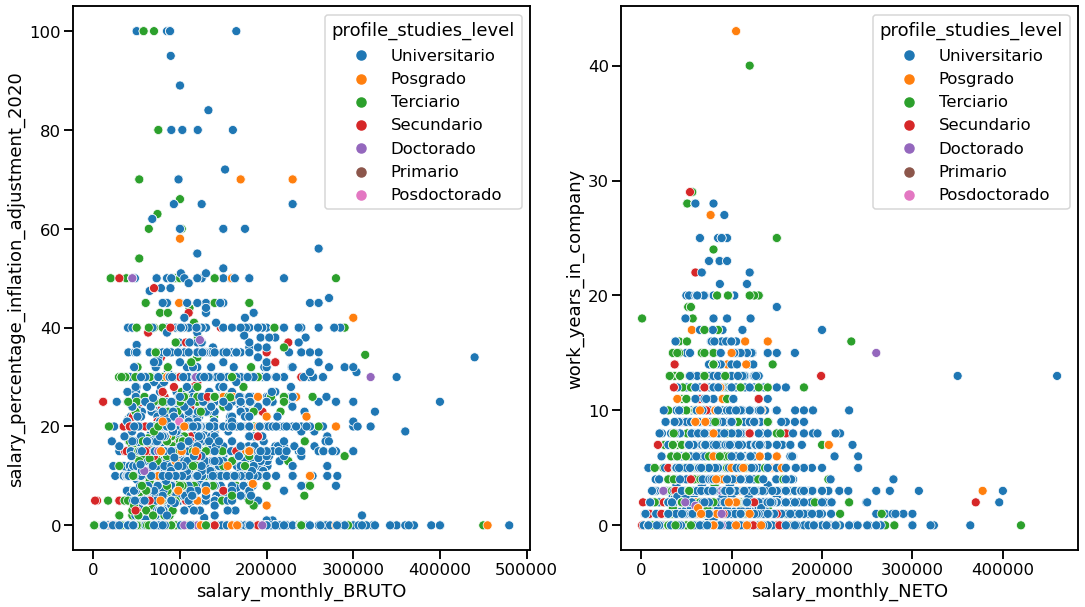

In [73]:
fig, axes = plt.subplots(1, 2 , figsize=(18, 10))

seaborn.scatterplot(ax = axes[0] , data=df_no_outliers_interesting_languages_part_2, x="salary_monthly_BRUTO", y="salary_percentage_inflation_adjustment_2020" , hue="profile_studies_level")

seaborn.scatterplot(ax = axes[1] , data=df_no_outliers_interesting_languages_part_2, x="salary_monthly_NETO", y="work_years_in_company" , hue="profile_studies_level")

## b) Asociación

* Necesitamos decidir si sacar o no la columna de salario bruto. Para hacer la encuesta más simple.
¿Existe una correlación entre el salario bruto y el neto? Que abordaje y medidas usaría



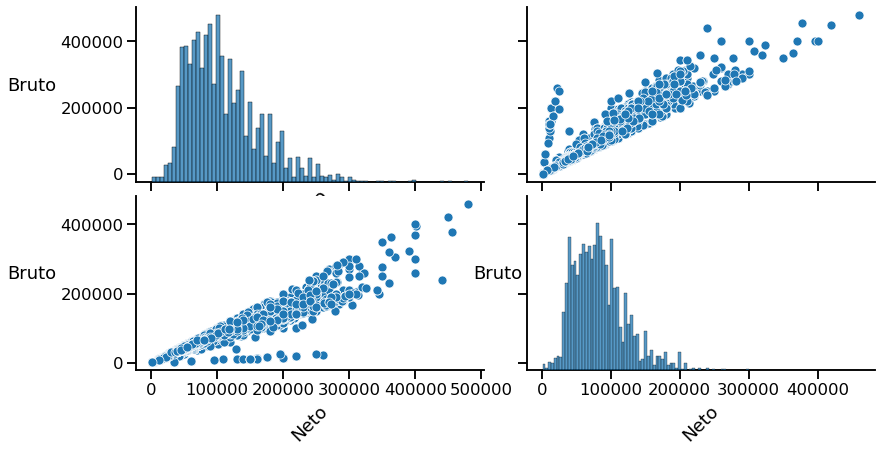

In [74]:
g = seaborn.pairplot(df_no_outliers_interesting_languages_part_2[[ 'salary_monthly_BRUTO', 'salary_monthly_NETO' ]] ,aspect=2 ,height=3 )
for axes in g.axes.flat:
     axes.set_ylabel("Bruto", rotation=0, horizontalalignment='right')
     axes.set_xlabel("Neto", rotation=45)

In [75]:
df_no_outliers_interesting_languages_part_2[ 'salary_monthly_BRUTO'].corr(df_no_outliers_interesting_languages[ 'salary_monthly_NETO'])

0.9491814626506064

### Se puede observar en los gráficos que las variables de salario Bruto y Neto están altamente correlacionadas. También se puede verificar esta correlación de manera numérica (correlación > 95%). Este alto nivel de correlación nos permite prescindir de una de las dos columnas.

## c) Densidad condicional 

Estudie la distribución del salario según el nivel de estudio.

Separe la población según el nivel de estudio (elija dos subpoblaciones numerosas) y grafique de manera comparativa ambos histogramas de la variable `'salary_monthly_NETO'`
¿Considera que ambas variables son independientes?
¿Qué analizaría al respecto?

Calcule medidas de centralización y dispersión para cada subpoblación






In [76]:
pob_terciario = df_no_outliers_interesting_languages_part_2[df_no_outliers_interesting_languages_part_2['profile_studies_level']== 'Terciario']
pob_universitario = df_no_outliers_interesting_languages_part_2[df_no_outliers_interesting_languages_part_2['profile_studies_level']== 'Universitario']


mean_ter = pob_terciario['salary_monthly_NETO'].mean()
median_ter = pob_terciario['salary_monthly_NETO'].median()
std_ter = pob_terciario['salary_monthly_NETO'].std()

mean_uni = pob_universitario['salary_monthly_BRUTO'].mean()
median_uni = pob_universitario['salary_monthly_BRUTO'].median()
std_uni = pob_universitario['salary_monthly_BRUTO'].std()

print ("Estudios Terciarios")
print (f" Media: {mean_ter} , Mediana: {median_ter} , Des: {std_ter} ")

print ("Estudios Universitarios")
print (f" Media: {mean_uni} , Mediana: {median_uni} , Des: {std_uni} ")


Estudios Terciarios
 Media: 77512.73374317934 , Mediana: 72000.0 , Des: 37455.044117025776 
Estudios Universitarios
 Media: 111765.35351354268 , Mediana: 100000.0 , Des: 56186.433174390135 


/Users/coviedo/opt/anaconda3/envs/diplodatos-ayvd/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/coviedo/opt/anaconda3/envs/diplodatos-ayvd/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/coviedo/opt/anaconda3/envs/diplodatos-ayvd/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':
/Users/covied

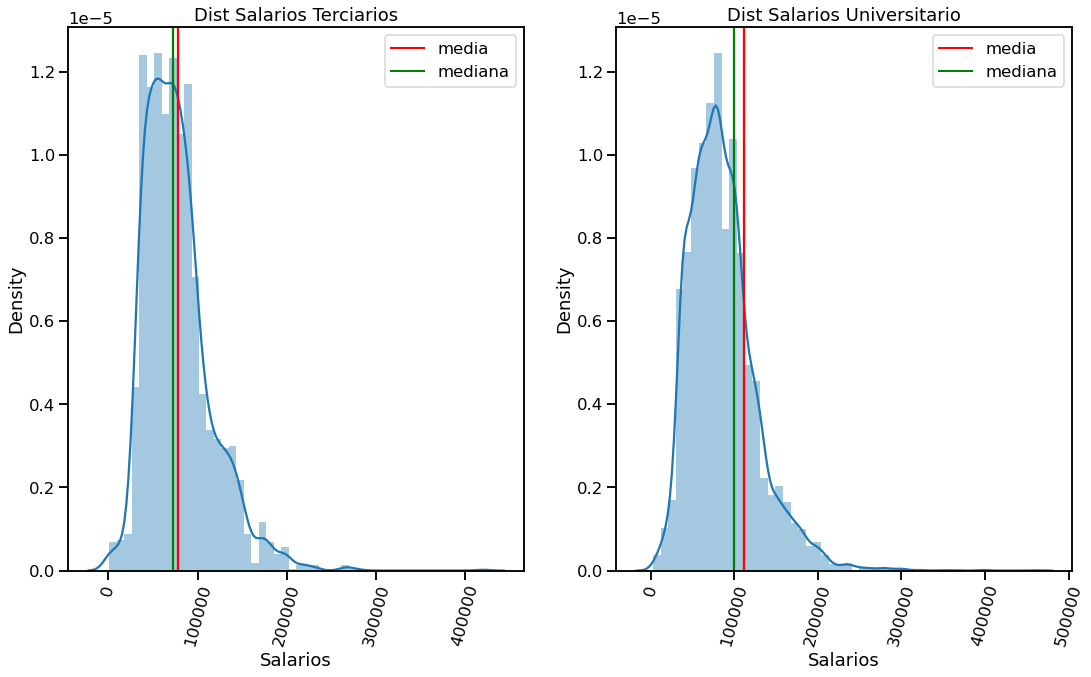

In [77]:
from matplotlib.lines import Line2D
fig, axes = plt.subplots(1, 2 , figsize=(18, 10))

seaborn.distplot(a = pob_terciario['salary_monthly_NETO'] ,ax = axes[0] )
seaborn.distplot(a = pob_universitario['salary_monthly_NETO'] ,ax = axes[1] )

plt.draw()

axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=75)
axes[0].set_xlabel('Salarios')

axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation=75)
axes[1].set_xlabel('Salarios')


#axes[0].set_ylabel('Salario Bruto')
axes[0].set_title('Dist Salarios Terciarios')
axes[0].axvline(mean_ter, color='r', linestyle='-')
axes[0].axvline(median_ter, color='g', linestyle='-')

axes[1].set_title('Dist Salarios Universitario')
axes[1].axvline(mean_uni, color='r', linestyle='-')
axes[1].axvline(median_uni, color='g', linestyle='-')


custom_lines = [Line2D([0], [0], color='red', lw=2),
            Line2D([0], [0], color='green', lw=2)]

axes[0].legend(custom_lines , ['media','mediana'])
axes[1].legend(custom_lines , ['media','mediana'])


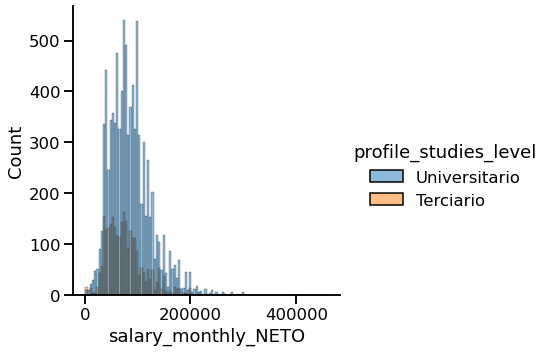

In [78]:

#fig, axes = plt.subplots(1, 1 , figsize=(18, 10))

df_uni_ter = df_no_outliers_interesting_languages_part_2[df_no_outliers_interesting_languages_part_2['profile_studies_level'].isin(['Universitario' , 'Terciario'])]


seaborn.displot(df_uni_ter , x='salary_monthly_NETO' , hue='profile_studies_level'  )


In [79]:
df_no_outliers_interesting_languages_part_2

,programming_language,tools_programming_languages,salary_monthly_NETO,salary_monthly_BRUTO,work_role,cured_programming_languages,profile_studies_level_state,profile_studies_level,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_gender,salary_percentage_inflation_adjustment_2020,profile_studies_level_ordinal
1,javascript,"HTML, Javascript, Python",63000.0,79000.0,Developer,"[html, javascript, python]",En curso,Universitario,5.0,2.0,2.0,4,Hombre,10.0,4
3,javascript,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,130000.0,SysAdmin / DevOps / SRE,"[bash/shell, c, css, html, java, javascript, p...",Incompleto,Posgrado,15.0,15.0,13.0,5,Hombre,0.0,5
4,javascript,"CSS, HTML, Javascript, SQL, TypeScript",106000.0,140000.0,Developer,"[css, html, javascript, sql, typescript]",En curso,Universitario,9.0,6.0,6.0,0,Hombre,0.0,4
5,javascript,"Java, Javascript",44000.0,54000.0,Developer,"[java, javascript]",Incompleto,Terciario,1.0,0.0,0.0,0,Hombre,15.0,3
6,javascript,Javascript,62400.0,75000.0,Developer,[javascript],Incompleto,Universitario,1.0,1.0,1.0,0,Hombre,8.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5707,r,"Bash/Shell, Python, R, SQL",97000.0,118000.0,BI Analyst / Data Analyst,"[bash/shell, python, r, sql]",En curso,Posgrado,5.0,2.0,2.0,0,Hombre,15.0,5
5874,r,"C, C++, C#, Delphi, Java, Javascript, Python, ...",105000.0,163000.0,Consultant,"[c, c++, c#, delphi, java, javascript, python,...",Completado,Universitario,14.0,10.0,4.0,0,Mujer,10.0,4
5889,r,"Java, Javascript, Python, R, SQL",66300.0,80000.0,Data Scientist / Data Engineer,"[java, javascript, python, r, sql]",Completado,Posgrado,3.0,1.0,1.0,4,Hombre,21.0,5
5967,r,"R, SQL",170282.0,271802.0,BI Analyst / Data Analyst,"[r, sql]",Completado,Universitario,18.0,10.0,2.5,1,Mujer,17.0,4


### Existen varias condiciones que dos  variables aleatorias deben cumplir para indicar si las mismas son independientes. Con lo cual no cumpliendo una de estas condiciones, podemos indicar que la variable no es independiente. Verificamos si no se cumple esta condición. De no cumplirse, podemos afirmar que las variables son dependientes


$$P(A|B) = {P(A)}$$


### Recordamos la fórmula para calcular la probabilidad condicional

$$P(A|B) = \frac{P(A \cap B)}{P(B)}$$

### Vamos a calcular: 
 - La probabilidad de tener un sueldo mayor a la media 
 - La probabilidad de tener un sueldo mayor a la media cuando el nivel de educación es:
	-- Universitario 
	-- Terciario
	-- Secundario

### Si las variables salary_monthly_NETO y profile_studies_level fueran independientes, la probabilidades deberían ser la mismas

In [80]:
sueldo_media = df_no_outliers_interesting_languages_part_2['salary_monthly_NETO'].mean()
sueldo_media

84595.13761737163

In [81]:
cantidad_sueldos_mayor_media = (df_no_outliers_interesting_languages_part_2['salary_monthly_NETO'] > sueldo_media).sum()
prob_sueldo_mayor_media = cantidad_sueldos_mayor_media / df_no_outliers_interesting_languages_part_2.shape[0]
prob_sueldo_mayor_media

0.43929949539922825

In [82]:
def cacular_probabilidad_mayor_media_muestral_dep_segun_nivel_estudio(profile_studies_level , sueldo_media ,df):

    prob_sueldo_mayor_media_universitario = (df[df['profile_studies_level'] == profile_studies_level]['salary_monthly_NETO'] > sueldo_media).sum() / (df['profile_studies_level'] == profile_studies_level).sum()
    return prob_sueldo_mayor_media_universitario

In [83]:
prob_dep_universitario = cacular_probabilidad_mayor_media_muestral_dep_segun_nivel_estudio ('Universitario' , sueldo_media, df_no_outliers_interesting_languages_part_2)
prob_dep_secundario = cacular_probabilidad_mayor_media_muestral_dep_segun_nivel_estudio ('Secundario' , sueldo_media, df_no_outliers_interesting_languages_part_2)
prob_dep_terciario = cacular_probabilidad_mayor_media_muestral_dep_segun_nivel_estudio ('Terciario' , sueldo_media, df_no_outliers_interesting_languages_part_2)

result = ("Iguales" if abs(prob_dep_universitario - prob_sueldo_mayor_media).round(2) < 0.01 else "Diferentes")
print (f"prob_dep_universitario : {prob_dep_universitario}  prob_sueldo_mayor_media : {prob_sueldo_mayor_media}. Las probabilidades son {result}")

result = ("Iguales" if abs(prob_dep_terciario - sueldo_media).round(2) < 0.01 else "Diferentes")
print (f"prob_dep_universitario : {prob_dep_terciario}  prob_sueldo_mayor_media : {prob_sueldo_mayor_media}. Las probabilidades son {result}")

prob_dep_universitario : 0.4606668824862415  prob_sueldo_mayor_media : 0.43929949539922825. Las probabilidades son Diferentes
prob_dep_universitario : 0.3557657329938159  prob_sueldo_mayor_media : 0.43929949539922825. Las probabilidades son Diferentes


### Se observa que  no se cumple 

$$P(A|B) = P(A)$$

### Esto implica quelas  variables profile_studies_level y salary_monthly_NETO no son indenpendientes. 

## d) Densidad Conjunta condicional

Elija dos variables numéricas y una categórica. 
Estudie la dispersión (scatterplot) de las dos variables discriminando en color por la variable categórica (ayuda: hue en seaborn)


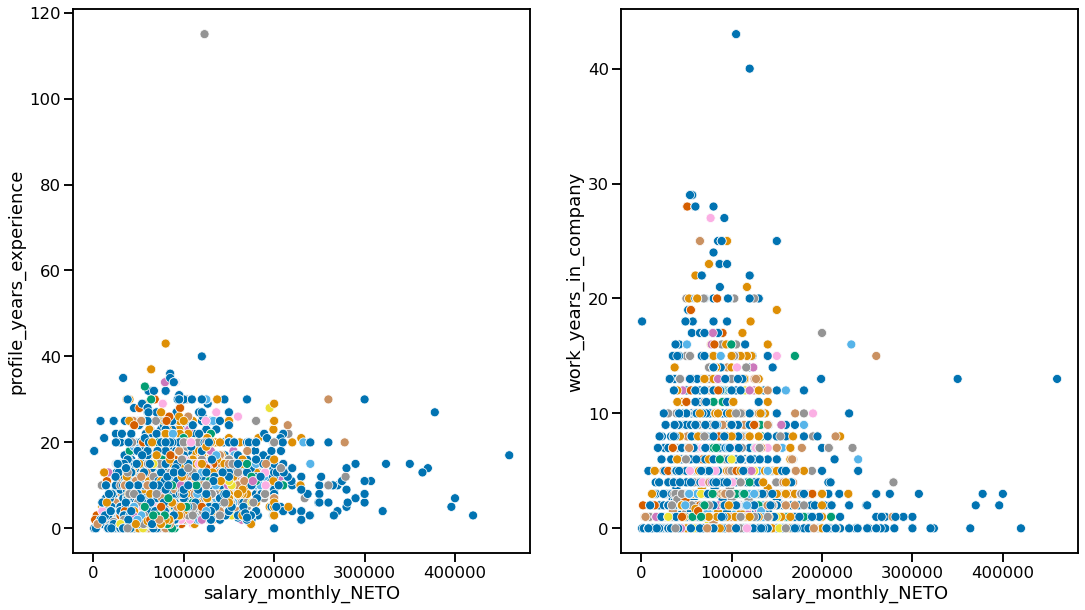

In [84]:

fig, axes = plt.subplots(1, 2 , figsize=(18, 10))

#profile year experience está altamente correlacionada
g_ = seaborn.scatterplot(ax = axes[0] , data=df_no_outliers_interesting_languages_part_2, x="salary_monthly_NETO", y="profile_years_experience" , hue='salary_percentage_inflation_adjustment_2020', palette="colorblind",legend= False)

g = seaborn.scatterplot(ax = axes[1] , data=df_no_outliers_interesting_languages_part_2, x="salary_monthly_NETO", y="work_years_in_company" , hue='salary_percentage_inflation_adjustment_2020',palette="colorblind",legend= False)


### Se observa un outlayer importante en profile_years_experiencie. Lo eliminamos para que el diagrama no se 'compacte'. Para ello filtramos por profile_years_experiencie < 65

<AxesSubplot:xlabel='salary_monthly_NETO', ylabel='work_years_in_company'>

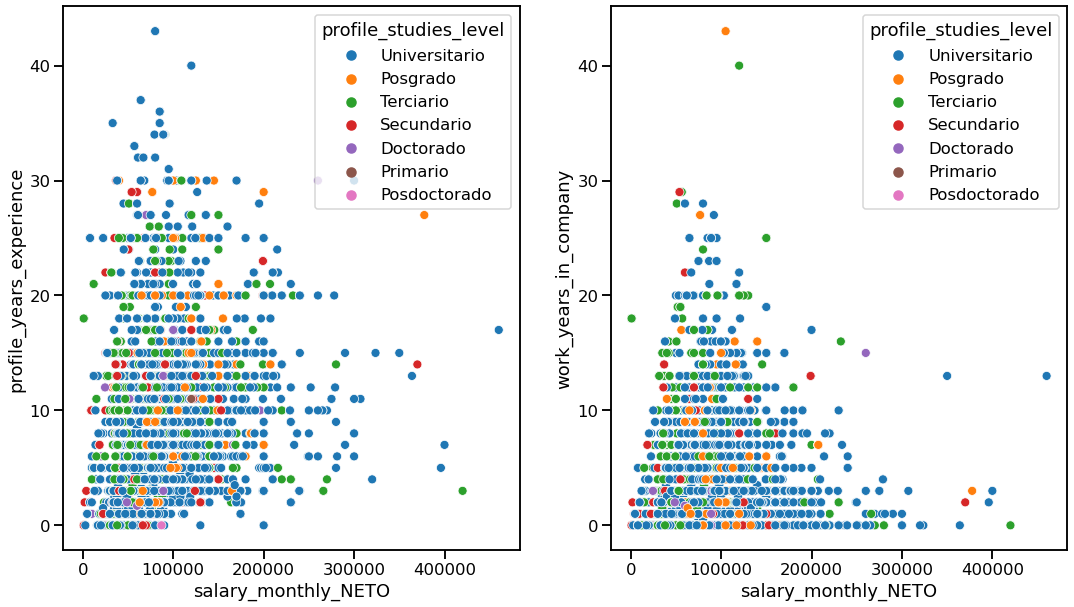

In [85]:
fig, axes = plt.subplots(1, 2 , figsize=(18, 10))


seaborn.scatterplot(ax = axes[0] , data=df_no_outliers_interesting_languages_part_2[df_no_outliers_interesting_languages_part_2.profile_years_experience < 65], x="salary_monthly_NETO", y="profile_years_experience" , hue="profile_studies_level")

seaborn.scatterplot(ax = axes[1] , data=df_no_outliers_interesting_languages_part_2[df_no_outliers_interesting_languages_part_2.profile_years_experience < 65], x="salary_monthly_NETO", y="work_years_in_company" , hue="profile_studies_level")

<AxesSubplot:xlabel='salary_monthly_NETO', ylabel='work_people_in_charge_of'>

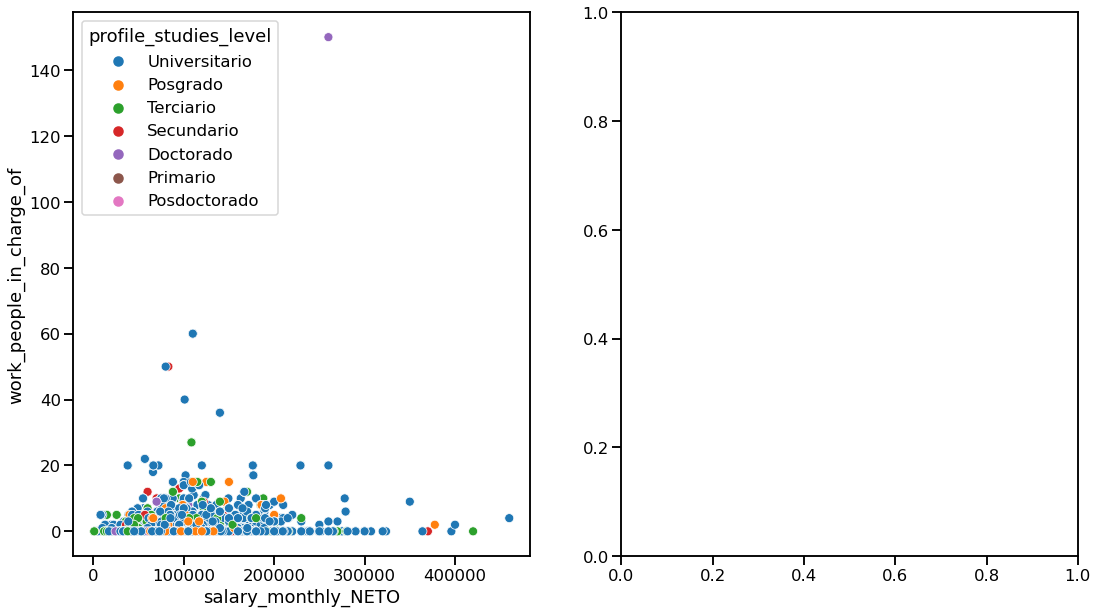

In [86]:

fig, axes = plt.subplots(1, 2 , figsize=(18, 10))


seaborn.scatterplot(ax = axes[0]  ,data=df_no_outliers_interesting_languages_part_2[df_no_outliers_interesting_languages_part_2.profile_years_experience < 60], x="salary_monthly_NETO", y="work_people_in_charge_of" , hue="profile_studies_level")